In [ ]:
using Iterators
using LightGraphs
using BayesNets
using PGFPlots
using TikzGraphs
using Discretizers
using RDatasets
using Plots

using StatsBase

movieData = readtable("datasorted.csv")

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/PlotUtils.ji for module PlotUtils.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/PlotThemes.ji for module PlotThemes.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/Showoff.ji for module Showoff.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/Measures.ji for module Measures.


In [ ]:
##### MANUAL BINNING #####

titleYear_edges = [1980,2000,2005,2010,2020]

budget_edges = [0,10000001,35000001,300000001]

gross_edges = [0,10000000,50000000,200000000,500000000,800000000]

duration_edges = [91,121,151,331]

numMovieFacebookLikes_edges = [1,10000,400000]

directorFacebookLikes_edges = [1,10000,40000]

castMovieLikes_edges = [100,10000,40000,700000]

numFacesInPoster_edges = [1,2,6,20]

imdbScore_edges = [3.1,4.1,5.1,6.1,7.1,8.1,9.1,10]

critic_edges = [101,201,301,401,820]

In [ ]:
##### UNIFORM WIDTH BINNING #####
#nbinsLarge = 7
#nbinsSmall = 3

titleYear_bins = 5
titleYear_edges = binedges(DiscretizeUniformWidth(titleYear_bins), movieData[:title_year])

budget_bins = 3
budget_edges = binedges(DiscretizeUniformWidth(budget_bins), movieData[:budget])

gross_bins = 5
gross_edges = binedges(DiscretizeUniformWidth(gross_bins), movieData[:gross])

duration_bins = 4
duration_edges = binedges(DiscretizeUniformWidth(duration_bins), movieData[:duration])

numMovieFacebookLikes_bins = 3
numMovieFacebookLikes_edges = binedges(DiscretizeUniformWidth(numMoveFacebookLikes_bins), movieData[:movie_facebook_likes])

directorFacebookLikes_bins = 3
directorFacebookLikes_edges = binedges(DiscretizeUniformWidth(directorFacebookLikes_bins), movieData[:director_facebook_likes])

castMovieLikes_bins = 4
castMovieLikes_edges = binedges(DiscretizeUniformWidth(castMovieLikes_bins), movieData[:cast_total_facebook_likes])

numFacesInPoster_bins = 4
numFacesInPoster_edges = binedges(DiscretizeUniformWidth(numFacesInPoster_bins), movieData[:facenumber_in_poster])

imdbScore_bins = 8
imdbScore_edges = binedges(DiscretizeUniformWidth(imdbScore_bins), movieData[:imdb_score])

critic_bins = 5
critic_edges = binedges(DiscretizeUniformWidth(critic_bins), movieData[:num_critic_for_reviews])


In [ ]:
##### UNIFORM COUNT BINNING #####
#nbinsLarge = 7
#nbinsSmall = 3

titleYear_bins = 5
titleYear_edges = binedges(DiscretizeUniformCount(titleYear_bins), movieData[:title_year])

budget_bins = 3
budget_edges = binedges(DiscretizeUniformCount(budget_bins), movieData[:budget])

gross_bins = 5
gross_edges = binedges(DiscretizeUniformCount(gross_bins), movieData[:gross])

duration_bins = 4
duration_edges = binedges(DiscretizeUniformCount(duration_bins), movieData[:duration])

numMovieFacebookLikes_bins = 3
numMovieFacebookLikes_edges = binedges(DiscretizeUniformCount(numMoveFacebookLikes_bins), movieData[:movie_facebook_likes])

directorFacebookLikes_bins = 3
directorFacebookLikes_edges = binedges(DiscretizeUniformCount(directorFacebookLikes_bins), movieData[:director_facebook_likes])

castMovieLikes_bins = 4
castMovieLikes_edges = binedges(DiscretizeUniformCount(castMovieLikes_bins), movieData[:cast_total_facebook_likes])

numFacesInPoster_bins = 4
numFacesInPoster_edges = binedges(DiscretizeUniformCount(numFacesInPoster_bins), movieData[:facenumber_in_poster])

imdbScore_bins = 8
imdbScore_edges = binedges(DiscretizeUniformCount(imdbScore_bins), movieData[:imdb_score])

critic_bins = 5
critic_edges = binedges(DiscretizeUniformCount(critic_bins), movieData[:num_critic_for_reviews])

In [ ]:
##### BAYESIAN BLOCKS BINNING #####

titleYear_edges = binedges(DiscretizeBayesianBlocks(), movieData[:title_year])

budget_edges = binedges(DiscretizeBayesianBlocks(), movieData[:budget])

gross_edges = binedges(DiscretizeBayesianBlocks(), movieData[:gross])

duration_edges = binedges(DiscretizeBayesianBlocks(), movieData[:duration])

numMovieFacebookLikes_edges = binedges(DiscretizeBayesianBlocks(), movieData[:movie_facebook_likes])

directorFacebookLikes_edges = binedges(DiscretizeBayesianBlocks(), movieData[:director_facebook_likes])

castMovieLikes_edges = binedges(DiscretizeBayesianBlocks(), movieData[:cast_total_facebook_likes])

numFacesInPoster_edges = binedges(DiscretizeBayesianBlocks(), movieData[:facenumber_in_poster])

imdbScore_edges = binedges(DiscretizeBayesianBlocks(), movieData[:imdb_score])

critic_edges = binedges(DiscretizeBayesianBlocks(), movieData[:num_critic_for_reviews])

In [ ]:
##### DATA DISCRETIZATION #####

contentRating_discretizer = CategoricalDiscretizer(movieData[:content_rating])

titleYear_discretizer = LinearDiscretizer(titleYear_edges)

budget_discretizer = LinearDiscretizer(budget_edges)

gross_discretizer = LinearDiscretizer(gross_edges)

duration_discretizer = LinearDiscretizer(duration_edges)

numMovieFacebookLikes_discretizer = LinearDiscretizer(numMovieFacebookLikes_edges)

directorFacebookLikes_discretizer = LinearDiscretizer(directorFacebookLikes_edges)

castMovieLikes_discretizer = LinearDiscretizer(castMovieLikes_edges)

numFacesInPoster_discretizer = LinearDiscretizer(numFacesInPoster_edges)

imdbScore_discretizer = LinearDiscretizer(imdbScore_edges)

critic_discretizer = LinearDiscretizer(critic_edges)

dataDiscretized = DataFrame(
  contentRating = encode(contentRating_discretizer, movieData[:content_rating]),
  titleYear = encode(titleYear_discretizer, movieData[:title_year]),
  budget = encode(budget_discretizer, movieData[:budget]),
  gross = encode(gross_discretizer, movieData[:gross]),
  duration = encode(duration_discretizer, movieData[:duration]),
  numMovieFacebookLikes = encode(numMovieFacebookLikes_discretizer, movieData[:movie_facebook_likes]),
  directorFacebookLikes = encode(directorFacebookLikes_discretizer, movieData[:director_facebook_likes]),
  castMovieLikes = encode(castMovieLikes_discretizer, movieData[:cast_total_facebook_likes]),
  numFacesInPoster = encode(numFacesInPoster_discretizer, movieData[:facenumber_in_poster]),
  imdbScore = encode(imdbScore_discretizer, movieData[:imdb_score]),
  numCriticReviews = encode(critic_discretizer, movieData[:num_critic_for_reviews])
)
writetable("dataDiscretized.csv", dataDiscretized)

In [5]:
##### separate training set #####
totalSize = length(dataDiscretized[1])
percentageTrain = 0.7
lastTrainExample = Int(floor(percentageTrain*totalSize))
dataDiscretizedTrain = dataDiscretized[1:lastTrainExample,:]
dataDiscretizedTest = dataDiscretized[lastTrainExample+1:totalSize,:]

,contentRating,titleYear,budget,gross,duration,numMovieFacebookLikes,directorFacebookLikes,castMovieLikes,numFacesInPoster,imdbScore,numCriticReviews
1,4,3,3,4,1,1,1,1,1,3,1
2,2,1,2,3,3,2,1,1,1,6,1
3,2,1,2,3,2,2,1,2,1,6,1
4,5,2,1,1,1,1,1,1,2,4,1
5,1,3,2,1,1,1,1,1,3,3,1
6,2,3,3,3,3,1,1,2,1,5,2
7,4,1,1,3,1,1,1,2,1,5,1
8,2,1,1,1,1,2,1,1,2,6,1
9,2,4,3,3,2,2,1,3,2,5,4
10,2,1,1,1,1,1,1,1,1,2,1


In [58]:
##### structure learning #####
varList = [:titleYear, :budget, :numCriticReviews, :directorFacebookLikes, :numMovieFacebookLikes, :castMovieLikes, 
  :numFacesInPoster, :imdbScore, :contentRating, :duration, :gross]
topoOrder = sample(1:11, 11, replace=false)
TabuList = [topoOrder]
bestScores = []
counter = 100

while counter>0
topoList=[varList[topoOrder[1]]]
for i = 2:11
    j = topoOrder[i]
    push!(topoList, symbol(varList[j]))
end

params = K2GraphSearch(topoList, DiscreteCPD, max_n_parents=4)

bn = fit(BayesNet, dataDiscretizedTrain, params)
b_score = bayesian_score(bn.dag, topoList, dataDiscretizedTrain)
push!(bestScores, b_score)

topoOrder = sample(1:11, 11, replace=false)
while any(x-> x==topoOrder, TabuList)==true
    topoOrder = sample(1:11, 11, replace=false)
end
push!(TabuList, topoOrder)
    
    counter -= 1
    print(counter)
end

9998979695949392919089888786858483828180797877767574737271706968676665646362616059585756555453525150494847464544434241403938373635343332313029282726252423222120191817161514131211109876543210

In [59]:
best = find(x-> x==maximum(bestScores), bestScores)
topoOrder = TabuList[best[1]]
topoList=[varList[topoOrder[1]]]
for i = 2:11
    j = topoOrder[i]
    push!(topoList, symbol(varList[j]))
end

In [3]:
topoList = [:budget, :gross, :numFacesInPoster, :directorFacebookLikes, :titleYear, 
  :duration, :contentRating, :castMovieLikes, :imdbScore, :numCriticReviews, :numMovieFacebookLikes]

11-element Array{Symbol,1}:
 :budget               
 :gross                
 :numFacesInPoster     
 :directorFacebookLikes
 :titleYear            
 :duration             
 :contentRating        
 :castMovieLikes       
 :imdbScore            
 :numCriticReviews     
 :numMovieFacebookLikes

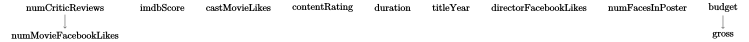

In [6]:
params = K2GraphSearch(topoList, DiscreteCPD, max_n_parents=4)

bn = fit(BayesNet, dataDiscretizedTrain, params)

In [7]:
b_score = bayesian_score(bn.dag, topoList, dataDiscretizedTrain)

-1544.3035956781234

In [63]:
maximum(bestScores)

-1542.2094438639062